# Assignment3

1. Perfect Relationship - Zero Correlation 

- Consider the quadratic relationship:

i xi yi

1 −2 4

2 −1 1

3 0 0

4 1 1

5 2 4

a. Produce a graph of this data set;

b. Calculate the correlation coefficient and chack that it is equal to zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a.

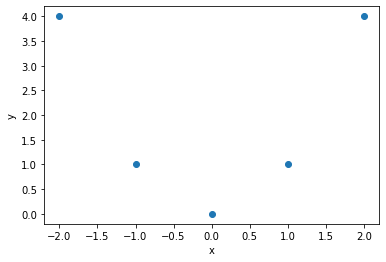

In [3]:
x = np.array([-2,-1,0,1,2])
y = x**2
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title = 'graph of this data set'
plt.show()

b.

In [4]:
r = np.corrcoef(x, y)[0][1]
print('The correlation coefficient is: {}'.format(r))
print('It is equal to zero')

The correlation coefficient is: 0.0
It is equal to zero


2. Weighted Sums Show that the estimate $\hat{\beta_1}$ is a weighted sum of the observed response $y_i$, ie, that 

$$\hat{\beta_1} = \sum_{i=1}^{n}\omega_iy_i$$
Hint: Consider the weights
$$\omega_i = \frac{x_i-\bar{x}}{SS_{xx}}$$
and note that
$$\sum_{i=1}^{n}\omega_i = 0$$

***
$$\hat{\beta_1}= \frac{Cov(X, Y)}{Var(X)} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})y_i -\sum_{i=1}^{n}(x_i-\bar{x})\bar{y}}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$
$$= \frac{\sum_{i=1}^{n}(x_i-\bar{x})y_i}{\sum_{i=1}^{n}(x_i-\bar{x})^2} - \frac{\sum_{i=1}^{n}(x_i-\bar{x})\bar{y}}{\sum_{i=1}^{n}(x_i-\bar{x})^2} =\frac{\sum_{i=1}^{n}(x_i-\bar{x})y_i}{\sum_{i=1}^{n}(x_i-\bar{x})^2}- \bar{y}\sum_{i=1}^{n}\omega_i $$
$$= \frac{\sum_{i=1}^{n}(x_i-\bar{x})y_i}{\sum_{i=1}^{n}(x_i-\bar{x})^2}- 0 = \sum_{i=1}^{n}\frac{(x_i-\bar{x})y_i}{\sum_{i=1}^{n}(x_i-\bar{x})^2} = \sum_{i = 1}^{n}\omega_iy_i $$

so the estimate $\hat{\beta_1}$ is a weighted sum of the observed response $y_i$

3. Simple Linear Regression Model - The file thuesen contains the blood glucose and short velocity measurements
for 25 patients (note that the short velocity data for patient 17 is missing).

a. Fit a simple linear regression model to the data (use short velocity as the response);

b. Test the hypothesis that $\beta_1$ = 0;

c. Calculate the model’s $R^2$;

d. Examine the residuals. Do you have confidence the linear regression model’s assumptions hold?

a. 

In [2]:
thuesen = np.genfromtxt('thuesen.csv', delimiter = ',')
x = thuesen[1:, 0]
y = thuesen[1:, 1]
x = np.delete(x, 15)
y = np.delete(y, 15)

beta_1_hat = np.corrcoef(x, y)[0][1] * (np.std(y)/np.std(x))
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
print('y = {}x+{}'.format(beta_1_hat, beta_0_hat))

y = 0.021962522259996755x+1.0978148777723817


In [3]:
def linear_regression_model(x):
    y = beta_0_hat + x * beta_1_hat
    return y

b. 

$$t = \frac{\hat{\beta_1}-\beta_1}{se(\hat{\beta_1})} = \frac{\hat{\beta_1}-\beta_1}{( \frac{\sqrt {MSE}}{\sqrt{\sum(x_i-\bar{x})^2}})}$$

In [11]:
y_pred = linear_regression_model(x)
beta1 = 0
denominator = 0.0105 # se(beta_1_hat)
t = (beta_1_hat - beta1)/denominator

In [15]:
print("t = : ", t)

t = :  2.0916687866663577


In [16]:
from scipy import stats
crit = 2.0739  # p = 0.05/2, df=22
if t>crit:
    print('reject H0')
else:
    print('do not reject H0')

reject H0


c. 

In [9]:
SSR = np.sum(np.square(y_pred-np.mean(y)))
SST = np.sum(np.square(y-np.mean(y)))
R2 = SSR/SST
print('R2: ',R2)

R2:  0.17368439567153518


d. 

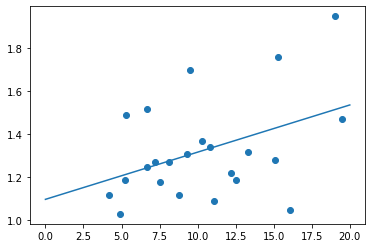

In [18]:
residuals = y-y_pred
plt.scatter(x,y)
a = np.linspace(0,20,200)
plt.plot(a, linear_regression_model(a))
plt.show()

Text(0, 0.5, 'residuals')

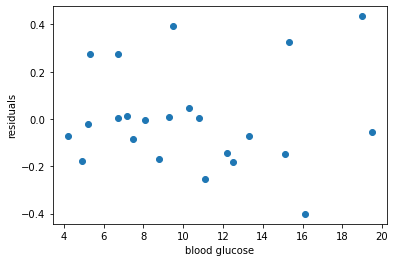

In [19]:
plt.scatter(x, residuals)
plt.xlabel("blood glucose")
plt.ylabel('residuals')

The residual is large and does not satisfy homoscedasticity. therefore, I do not have confidence that the linear regression assumption model holds.